In [10]:
# written by hao (2018/05/16)
# rock3.hao@gmail.com
# qinlab.BNU

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt

In [2]:
res_behav_Child = pd.read_csv('../../../AnalyDocs/basic_CBDC_img5behav.csv')
res_behav_Adult = pd.read_csv('../../../AnalyDocs/basic_CBDA_img5behav.csv')

res_beta_A = pd.read_csv('../../../AnalyDocs/res_extrmean_alert_con.csv')
res_beta_O = pd.read_csv('../../../AnalyDocs/res_extrmean_orient_con.csv')
res_beta_C = pd.read_csv('../../../AnalyDocs/res_extrmean_conflict_con.csv')

In [3]:
def radar_hao_ca(rois,roiname,lmin,lmax):
    res_CA = pd.merge(res_behav_Child, res_beta_A, how='inner', on = "Scan_ID")
    res_CO = pd.merge(res_behav_Child, res_beta_O, how='inner', on = "Scan_ID")
    res_CC = pd.merge(res_behav_Child, res_beta_C, how='inner', on = "Scan_ID")
    res_C = pd.DataFrame([np.mean(res_CA[rois]),np.mean(res_CO[rois]),np.mean(res_CC[rois])])
    
    res_AA = pd.merge(res_behav_Adult, res_beta_A, how='inner', on = "Scan_ID")
    res_AO = pd.merge(res_behav_Adult, res_beta_O, how='inner', on = "Scan_ID")
    res_AC = pd.merge(res_behav_Adult, res_beta_C, how='inner', on = "Scan_ID")
    res_A = pd.DataFrame([np.mean(res_AA[rois]),np.mean(res_AO[rois]),np.mean(res_AC[rois])])
    
    fig_set = mplt.figure(figsize=(14,6))
    ## PART 1: Create background
    # number of variable
    N = len(list(res_C)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(121, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, rotation='vertical', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,5], color="lightgrey", size=10)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_C.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_C.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")
    
    values = res_C.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Conflict", color="deepskyblue")
    #mplt.legend(loc='best', bbox_to_anchor=(0, 0))
    
    # Initialise the spider plot
    ax = mplt.subplot(122, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,5], color="lightgrey", size=10)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_A.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label=" Alerting", color="lightcoral")

    values = res_A.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orienting", color="yellowgreen")

    values = res_A.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label=" Conflict", color="deepskyblue")
    
    mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0.1, 0.1))
    mplt.savefig("/Users/haol/Downloads/radar_ca.png", dpi=600, transparent=True)

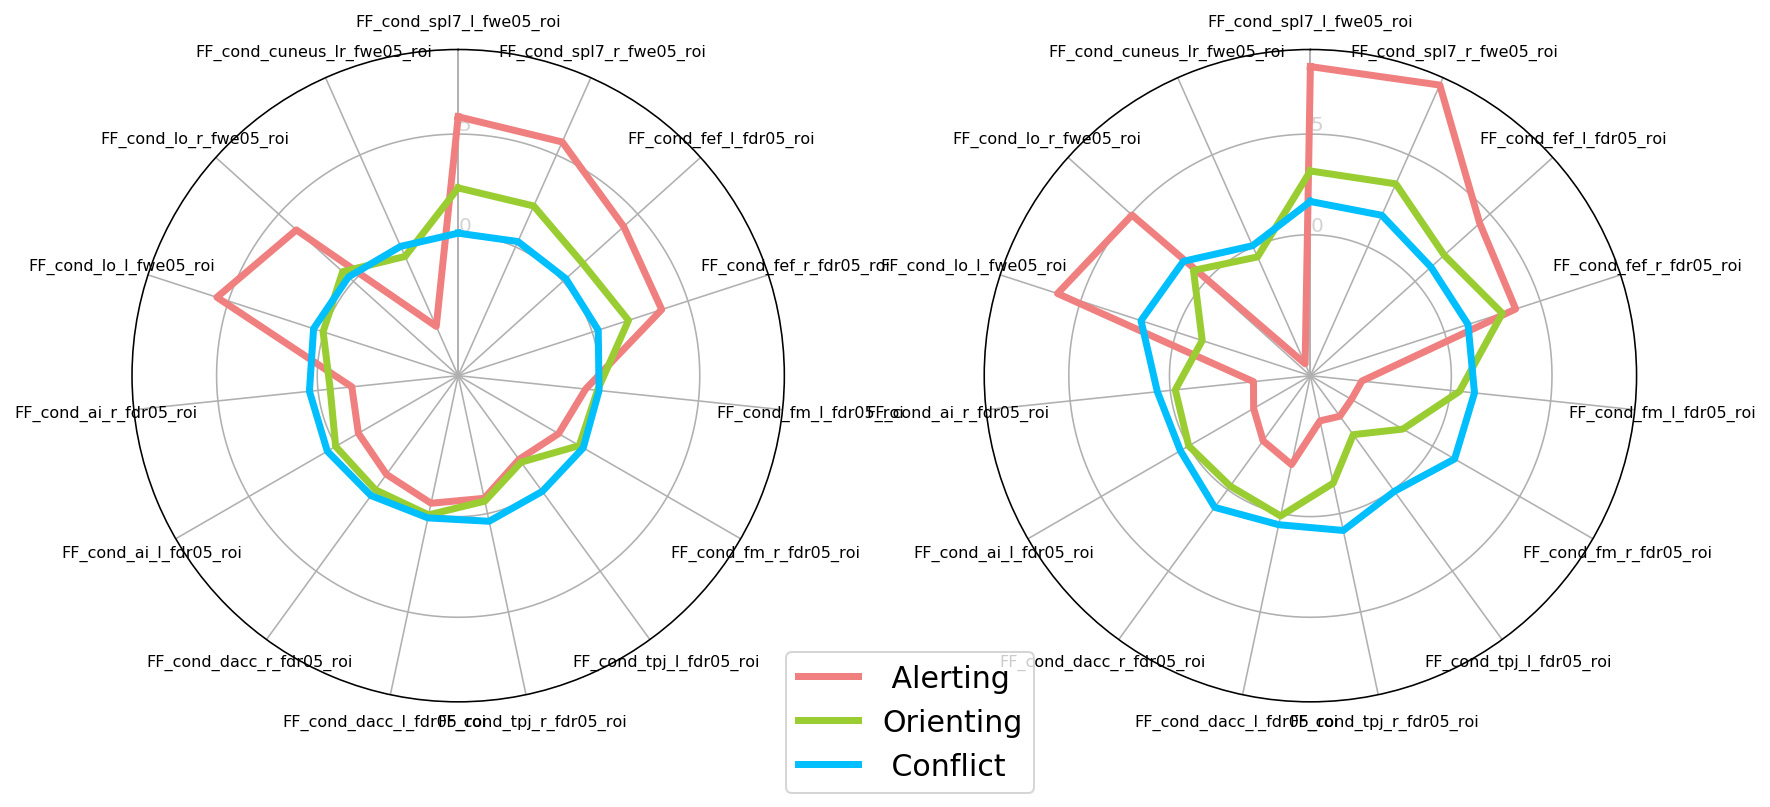

In [4]:
rois = [
    "FF_cond_spl7_l_fwe05_roi","FF_cond_spl7_r_fwe05_roi",
    "FF_cond_fef_l_fdr05_roi","FF_cond_fef_r_fdr05_roi",
    
    "FF_cond_fm_l_fdr05_roi","FF_cond_fm_r_fdr05_roi",
    "FF_cond_tpj_l_fdr05_roi","FF_cond_tpj_r_fdr05_roi",
   
    "FF_cond_dacc_l_fdr05_roi","FF_cond_dacc_r_fdr05_roi",
    "FF_cond_ai_l_fdr05_roi","FF_cond_ai_r_fdr05_roi",        
       
    "FF_cond_lo_l_fwe05_roi","FF_cond_lo_r_fwe05_roi",
    "FF_cond_cuneus_lr_fwe05_roi"
       ]
roiname = rois
radar_hao_ca(rois, roiname, -7,9.2)

In [10]:
def radar_hao_c(rois,roiname,lmin,lmax):
    res_CA = pd.merge(res_behav_Child, res_beta_A, how='inner', on = "Scan_ID")
    res_CO = pd.merge(res_behav_Child, res_beta_O, how='inner', on = "Scan_ID")
    res_CC = pd.merge(res_behav_Child, res_beta_C, how='inner', on = "Scan_ID")
    res_C = pd.DataFrame([np.mean(res_CA[rois]),np.mean(res_CO[rois]),np.mean(res_CC[rois])])
    
    
    fig_set = mplt.figure(figsize=(8,8))
    ## PART 1: Create background
    # number of variable
    N = len(list(res_C)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, rotation='vertical', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,5], color="lightgrey", size=10)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_C.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_C.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")
    
    values = res_C.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Conflict", color="deepskyblue")
    #mplt.legend(loc='best', bbox_to_anchor=(0, 0))
    
    #mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0, 0))
    mplt.savefig("/Users/haol/Downloads/radar_c.png", dpi=600, transparent=True)

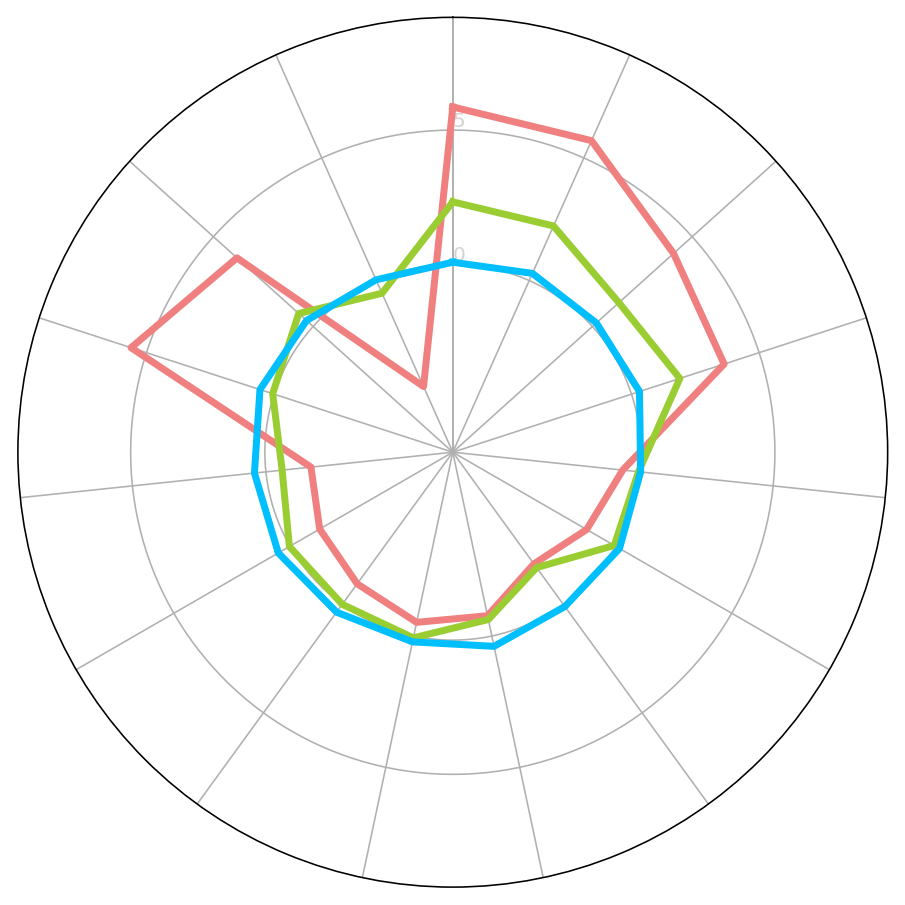

In [11]:
roiname = []
radar_hao_c(rois, roiname, -7,9.2)

In [12]:
def radar_hao_a(rois,roiname,lmin,lmax):    
    res_AA = pd.merge(res_behav_Adult, res_beta_A, how='inner', on = "Scan_ID")
    res_AO = pd.merge(res_behav_Adult, res_beta_O, how='inner', on = "Scan_ID")
    res_AC = pd.merge(res_behav_Adult, res_beta_C, how='inner', on = "Scan_ID")
    res_A = pd.DataFrame([np.mean(res_AA[rois]),np.mean(res_AO[rois]),np.mean(res_AC[rois])])
    
    fig_set = mplt.figure(figsize=(8,8))
    # number of variable
    N = len(list(res_A)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, size=8)
    # Draw ylabelsradar_hao_c(rois, roiname, -7,9.2)
    ax.set_rlabel_position(0)
    mplt.yticks([0,5], color="lightgrey", size=10)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_A.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_A.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")

    values = res_A.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Conflict", color="deepskyblue")
    
    #mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0, 0))
    mplt.savefig("/Users/haol/Downloads/radar_a.png", dpi=600, transparent=True)

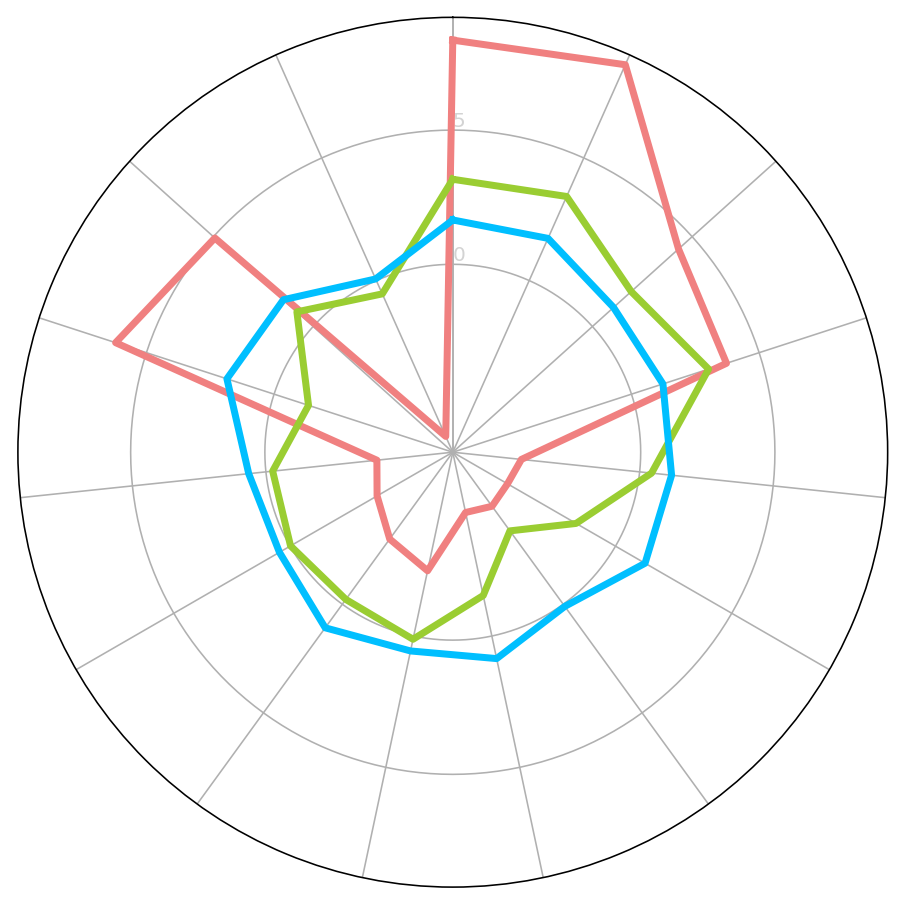

In [13]:
roiname = []
radar_hao_a(rois, roiname, -7,9.2)